# Presidential vote by California counties

### Import Python tools

In [1]:
%load_ext lab_black

In [2]:
import pandas as pd
import geopandas as gpd

In [3]:
df = pd.read_csv("data/presidential/pres20.csv")

In [4]:
df["winner"] = df[["dem", "rep", "other"]].idxmax(axis=1)

In [5]:
df.head()

,county,dem,rep,other,total_votes,dem_pct,rep_pct,other_pct,year,winner
0,Alameda,617659,136309,16102,770070,0.80,0.18,0.02,2020,dem
1,Alpine,476,244,21,741,0.64,0.33,0.03,2020,dem
2,Amador,8153,13585,566,22304,0.37,0.61,0.03,2020,rep
3,Butte,50426,48730,2910,102066,0.49,0.48,0.03,2020,dem
4,Calaveras,10046,16518,600,27164,0.37,0.61,0.02,2020,rep


---

### Geography

In [6]:
counties = gpd.read_file("data/geo/ca-counties.json")

In [7]:
counties.plot()

In [11]:
counties_usa = gpd.read_file("data/geo/usa_counties/USA_Counties.shp")

In [12]:
counties_usa.plot()

In [28]:
exclude = ["Alaska", "Hawaii", "Puerto Rico"]

In [29]:
counties_usa_clean = counties_usa[~counties_usa["STATE_NAME"].isin(exclude)]

<AxesSubplot:>

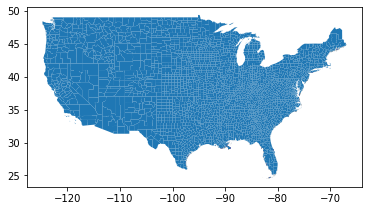

In [30]:
counties_usa_clean.plot()

---

### Merge

In [8]:
prez_geo = counties.merge(df, left_on="name", right_on="county")

---

### Export

In [9]:
prez_geo.to_file("data/geo/prez_geo.geojson", driver="GeoJSON")

In [10]:
df.to_csv("data/presidential/pres20_tutorial.csv", index=False)